# Rayleigh-Ritz

Example from 2.4 of Reddy 

$$
-\frac{d^2\,u}{d\,x^2} - u + x^2 = 0,\,\,\,\,0 < x < 1
$$


In [282]:
import numpy as np

from numpy import sin
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [283]:
# Analytical Solution
def f(x):
    return (sin(x) + 2 * sin(1 - x)) / sin(1) + (x**2) - 2 

In [284]:
x = np.linspace(0,1,100)

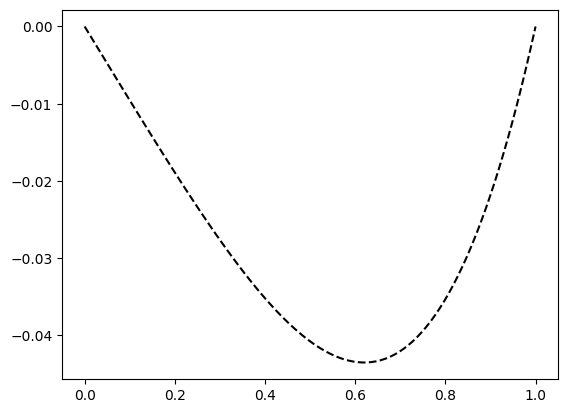

In [285]:
plt.plot(x, f(x), 'k--', label="Analytical Solution")
plt.show()

In [286]:
def phi_i(i : int) -> callable:
    return lambda x : (x**i) * (1 - x)

def d_phi(i : int) -> callable:
    return lambda x : (i * x**(i-1)) - ((i + 1) * x**i)

In [287]:
def B_ij(i : int, j : int) -> float:
    _f = lambda x : (d_phi(i)(x) * d_phi(j)(x)) - (phi_i(i)(x) * phi_i(j)(x))
    return quad(_f, 0, 1)[0]

In [288]:
def F_i(i : int) -> float:
    _f = lambda x : x * x * phi_i(i)(x)
    return -quad(_f, 0, 1)[0]

In [289]:
N = 2

B = np.array([[B_ij(i,j) for j in range(1, N+1)] for i in range(1,N+1)])
F = np.array([F_i(i) for i in range(1,N+1)])

In [290]:
C = np.linalg.solve(B, F)

In [291]:
def u(x):
    phi = [phi_i(i)(x) for i in range(1, N + 1)]
    return np.dot(C, phi)

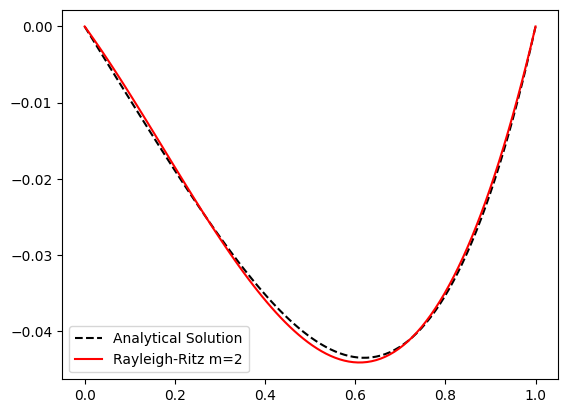

In [292]:
plt.plot(x, y, 'k--', label="Analytical Solution")
plt.plot(x, u(x), 'r', label=f"Rayleigh-Ritz m={N}")
plt.legend()
plt.show()